In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/GFG Data Science/EDA - Sugarcane/List of Countries by Sugarcane Production.csv")

In [ ]:
df.shape

(103, 7)

In [ ]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


**DATA Cleaning**

In [ ]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".",'')
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",'.')

In [ ]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df = df.drop("Unnamed: 0", axis =1)


In [ ]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df.isna().sum()

,0
Country,0
Continent,0
Production (Tons),0
Production per Person (Kg),0
Acreage (Hectare),1
Yield (Kg / Hectare),1


In [ ]:
df[df["Acreage (Hectare)"].isnull()]

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [ ]:
df = df.dropna().reset_index().drop("index", axis = 1)

In [ ]:
df

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8


In [ ]:
df.nunique()

,0
Country,102
Continent,6
Production (Tons),102
Production per Person (Kg),101
Acreage (Hectare),101
Yield (Kg / Hectare),102


In [ ]:
df.dtypes

,0
Country,object
Continent,object
Production (Tons),object
Production per Person (Kg),object
Acreage (Hectare),object
Yield (Kg / Hectare),object


In [ ]:
df["Production (Tons)"] = df["Production (Tons)"].astype(float)
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].astype(float)
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].astype(float)
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].astype(float)


In [ ]:
df.dtypes

,0
Country,object
Continent,object
Production (Tons),float64
Production per Person (Kg),float64
Acreage (Hectare),float64
Yield (Kg / Hectare),float64


**Univariate Analysis**

In [ ]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## How many countries produce sugarcane from each continent?

In [ ]:
df["Continent"].value_counts()

,count
Continent,
Africa,38
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


<Axes: xlabel='Continent'>

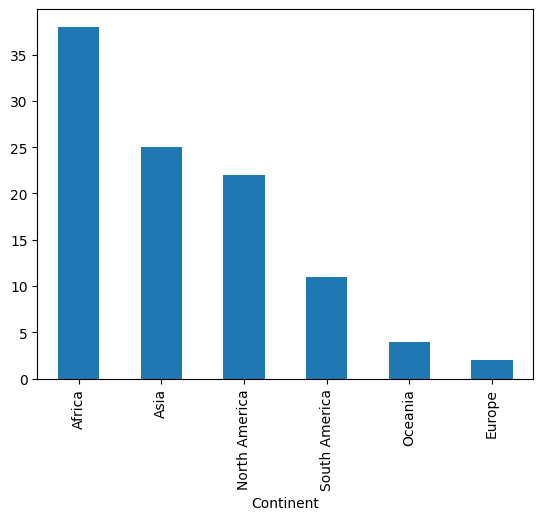

In [ ]:
df['Continent'].value_counts().plot(kind = "bar")

- African contries product the maxmimum amount of sugarcane products.

In [ ]:
df.describe()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


Checking outliers

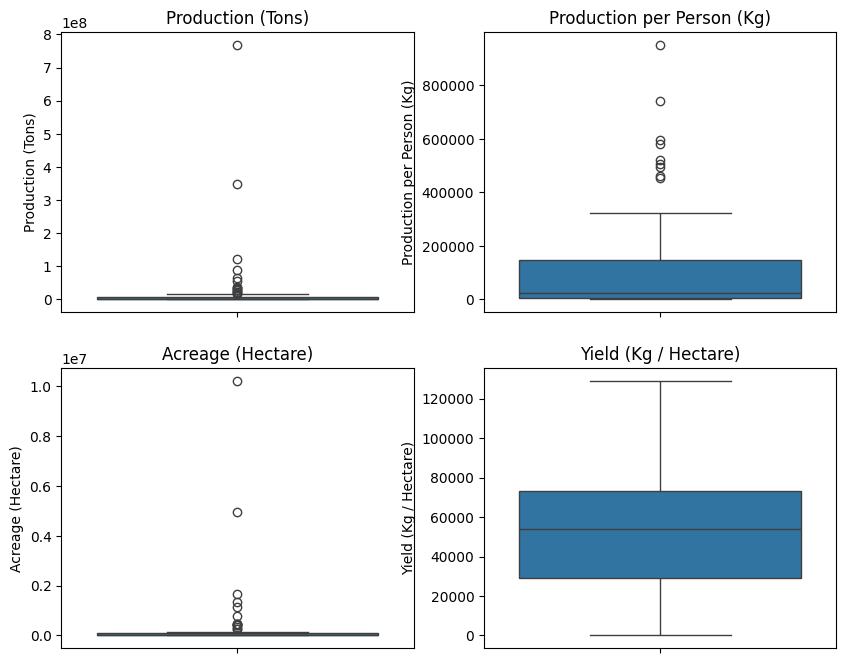

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(df["Production (Tons)"])
plt.title("Production (Tons)")

plt.subplot(2,2,2)
sns.boxplot(df["Production per Person (Kg)"])
plt.title("Production per Person (Kg)")

plt.subplot(2,2,3)
sns.boxplot(df["Acreage (Hectare)"])
plt.title("Acreage (Hectare)")

plt.subplot(2,2,4)
sns.boxplot(df["Yield (Kg / Hectare)"])
plt.title("Yield (Kg / Hectare)")
plt.show()

we have outliers in the data but outliers are required here as it shows the countries which has maximum production. And then we can see what are the reasons for outliers.

**Distribution of the columns**

<ipython-input-23-0eba3555f43f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production (Tons)"])
<ipython-input-23-0eba3555f43f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production per Person (Kg)"])
<ipython-input-23-0eba3555f43f>:11: UserWarning: 

`distplot` is a deprecat

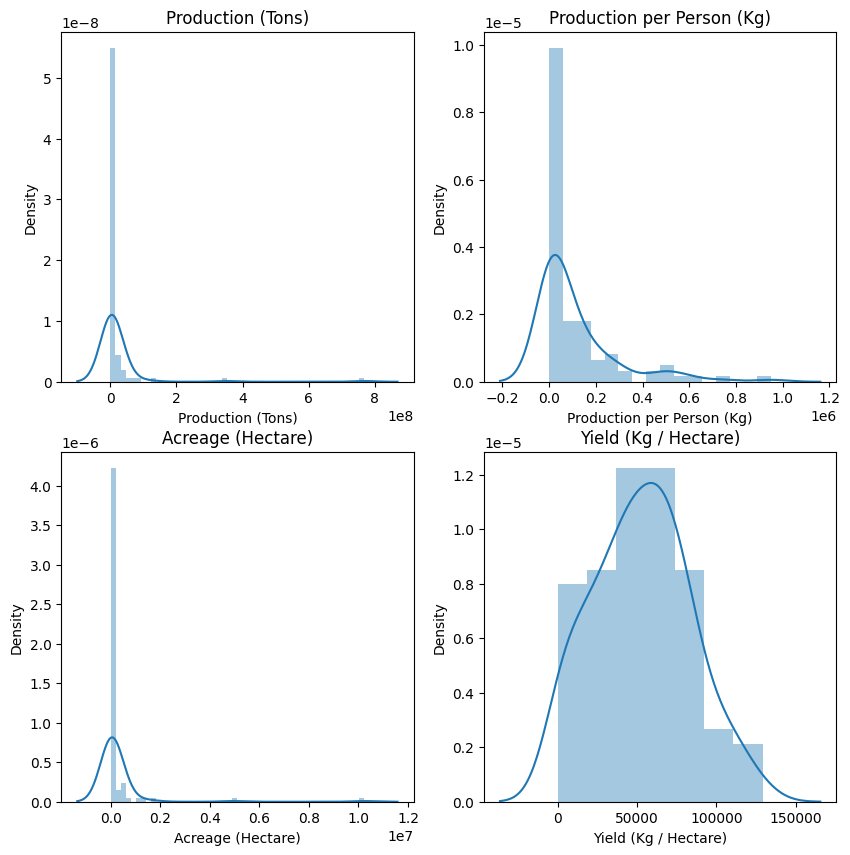

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production (Tons)"])
plt.title("Production (Tons)")

plt.subplot(2,2,2)
sns.distplot(df["Production per Person (Kg)"])
plt.title("Production per Person (Kg)")

plt.subplot(2,2,3)
sns.distplot(df["Acreage (Hectare)"])
plt.title("Acreage (Hectare)")

plt.subplot(2,2,4)
sns.distplot(df["Yield (Kg / Hectare)"])
plt.title("Yield (Kg / Hectare)")

plt.show()


<Axes: ylabel='Production (Tons)'>

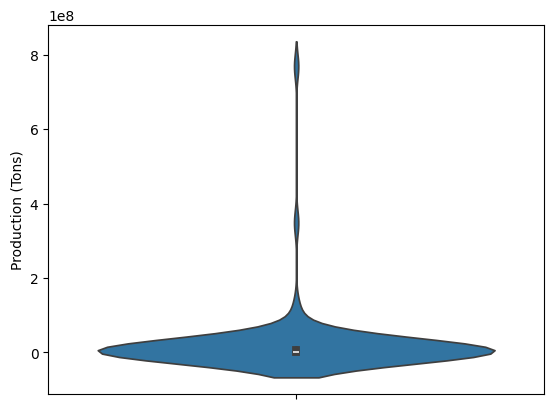

In [ ]:
sns.violinplot(df["Production (Tons)"])

**Bivariate Analysis**

In [ ]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## Which country produces maximum sugarcane?

In [ ]:
df_new = df[["Country","Production (Tons)"]].set_index("Country")

In [ ]:
df_new

,Production (Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [ ]:
df_new["Production(Tons)_percent"] = df_new["Production (Tons)"]*100/df_new["Production (Tons)"].sum()

In [ ]:
df_new

,Production (Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

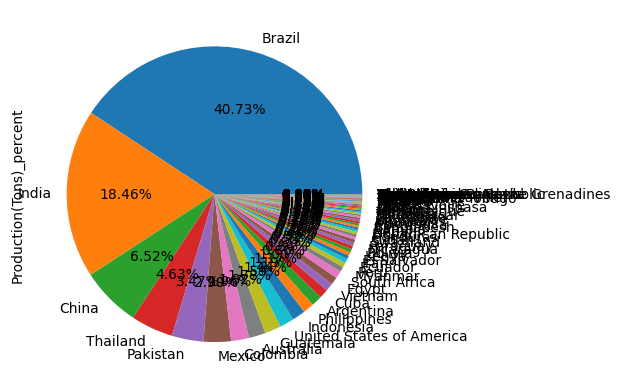

In [ ]:
df_new["Production(Tons)_percent"].plot(kind="pie", autopct = "%.2f%%")

<Axes: xlabel='Country'>

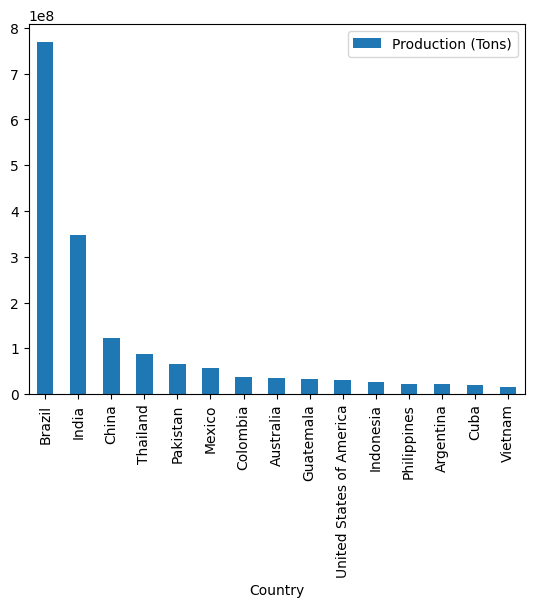

In [ ]:
df[["Country","Production (Tons)"]].set_index("Country").sort_values("Production (Tons)", ascending= False).head(15).plot(kind = "bar")

<ipython-input-32-607cbf75a6c6>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


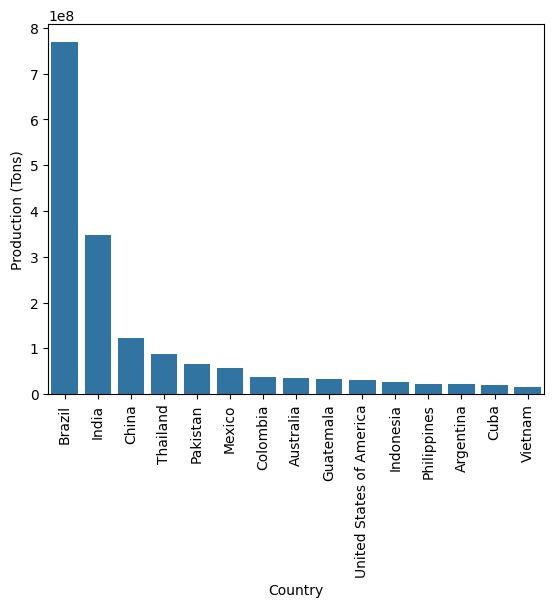

In [ ]:
ax = sns.barplot(data = df.head(15), x ="Country", y = "Production (Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

The country "Brazil" produces maximum sugarcane out of all countries.

## Which country has highest land?

<ipython-input-33-4f3a67aa652c>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


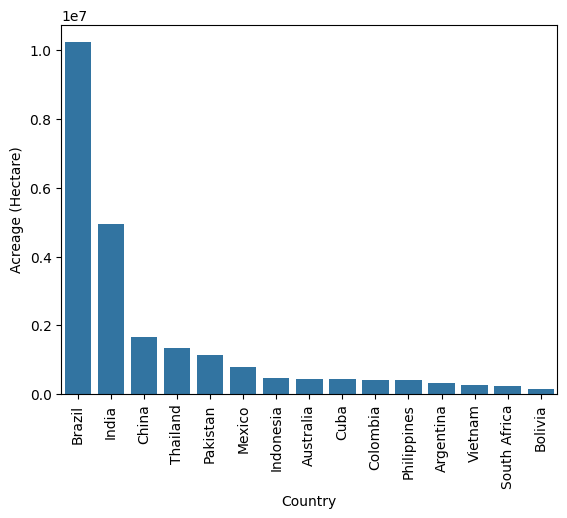

In [ ]:
df_acr = df.sort_values("Acreage (Hectare)", ascending = False).head(15)
ax  = sns.barplot(data = df_acr, x ="Country", y = "Acreage (Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

## Which country has highest yield per hectare?

<ipython-input-34-d9eac336a451>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


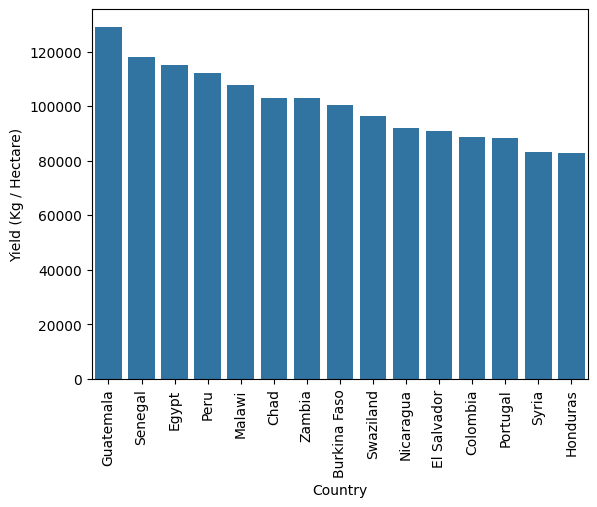

In [ ]:
df_yield = df.sort_values("Yield (Kg / Hectare)", ascending = False).head(15)
ax = sns.barplot(data  = df_yield, x = 'Country', y = "Yield (Kg / Hectare)")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

Guatemala has the highest yeild(kg/hectare)

## Which country has highest production?

<ipython-input-35-d2a3a5722424>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


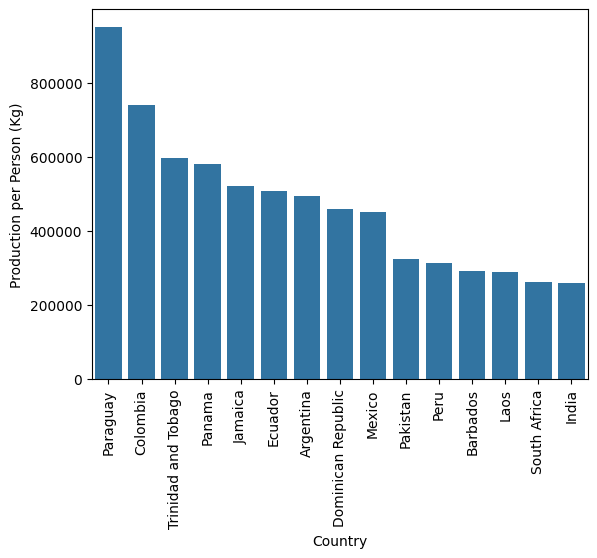

In [ ]:
df_yield  = df.sort_values("Production per Person (Kg)", ascending = False).head(15)
ax = sns.barplot(data = df_yield, x = "Country", y = "Production per Person (Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

Production per Person is highest in Paraguay

**Correlation**

In [ ]:
df_corr = df.select_dtypes(include = ["float64", "int64"])
df_corr.corr()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Production (Tons),1.000000,0.015000,0.997550,0.132812
Production per Person (Kg),0.015000,1.000000,0.012557,0.017999
Acreage (Hectare),0.997550,0.012557,1.000000,0.113433
Yield (Kg / Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

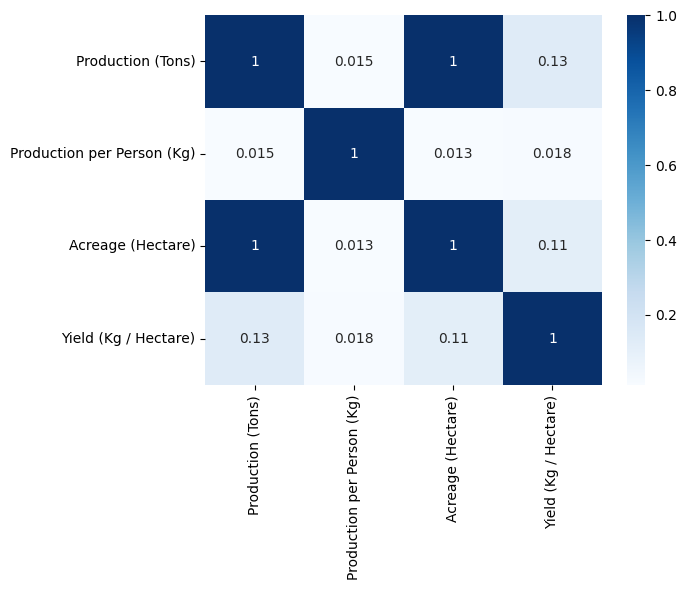

In [ ]:
sns.heatmap(df_corr.corr(), annot = True, cmap = "Blues")

## Do countries with highest land produce more sugarcane?

In [ ]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


Index(['Country', 'Continent', 'Production (Tons)',
       'Production per Person (Kg)', 'Acreage (Hectare)',
       'Yield (Kg / Hectare)'],
      dtype='object')


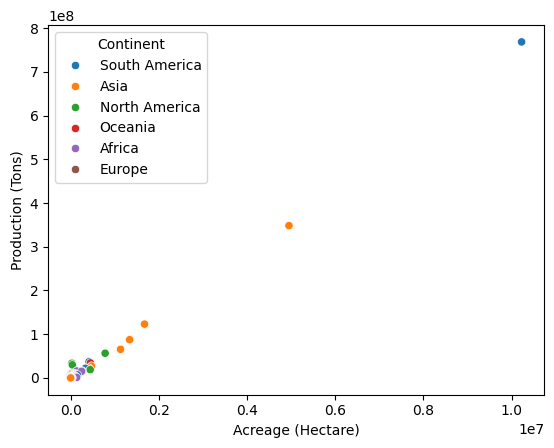

In [ ]:
df.columns = df.columns.str.strip()
print(df.columns)

sns.scatterplot(data=df, x='Acreage (Hectare)', y='Production (Tons)', hue='Continent')
plt.show()


Overall increase in land increases the production

### Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Production (Tons)'>

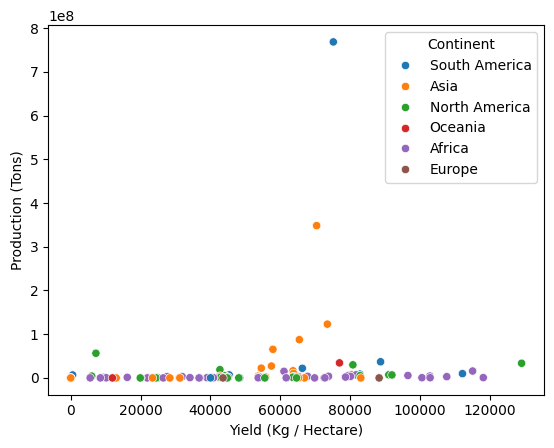

In [ ]:
sns.scatterplot(data = df, x = "Yield (Kg / Hectare)", y = 'Production (Tons)', hue = "Continent")

In [ ]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


**Analysis for Continent**

In [ ]:
df_continent = df.groupby("Continent").sum()


In [ ]:
df_continent["Number of Countries"] = df.groupby("Continent").count()["Country"]

In [ ]:
df_continent

,Country,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),Number of Countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


In [ ]:
df_continent.dtypes

,0
Country,object
Production (Tons),float64
Production per Person (Kg),float64
Acreage (Hectare),float64
Yield (Kg / Hectare),float64
Number of Countries,int64


### Which continent produces maximum sugarcane?

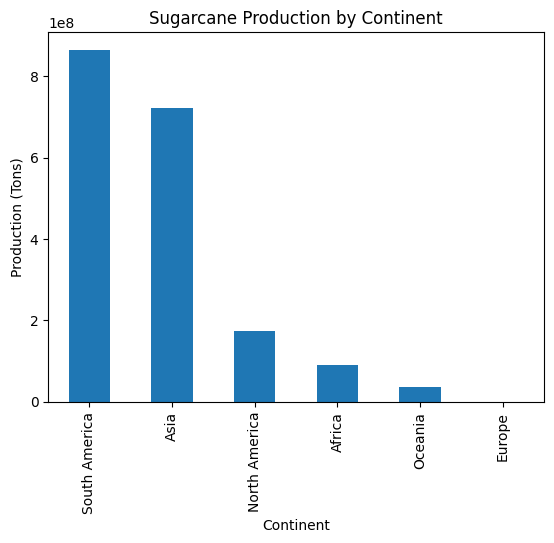

In [ ]:
df_continent["Production (Tons)"].sort_values(ascending=False).plot(kind="bar")
plt.title('Sugarcane Production by Continent')
plt.xlabel('Continent')
plt.ylabel('Production (Tons)')
plt.show()

### Do number of countries in a Continent effects production of sugarcane?

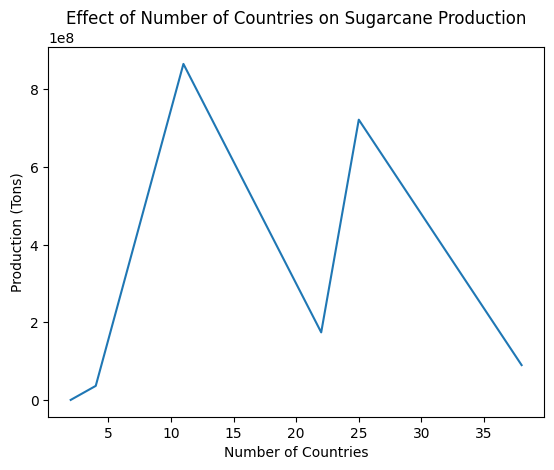

In [ ]:
sns.lineplot(data=df_continent, x="Number of Countries", y="Production (Tons)")
plt.title('Effect of Number of Countries on Sugarcane Production')
plt.xlabel('Number of Countries')
plt.ylabel('Production (Tons)')
plt.show()

###Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage (Hectare)', ylabel='Production (Tons)'>

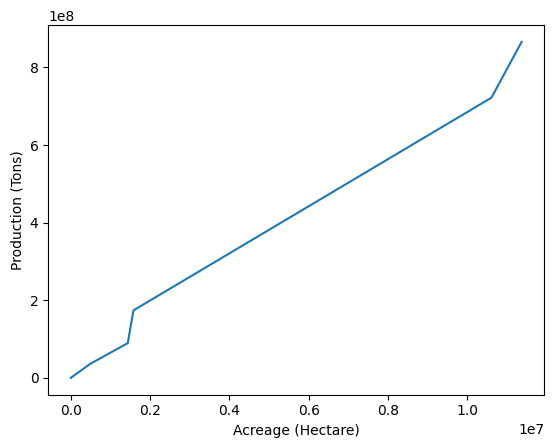

In [ ]:
sns.lineplot(data = df_continent,x = "Acreage (Hectare)", y= "Production (Tons)" )

### Production distribution by continent

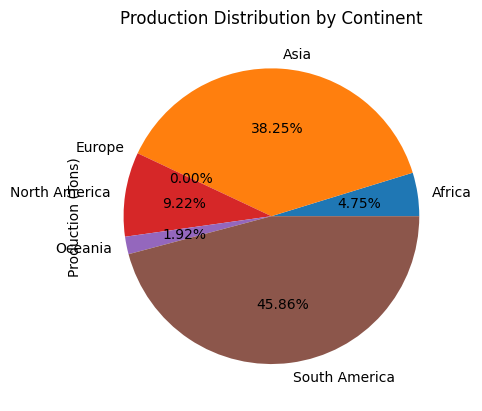

In [ ]:
df_continent["Production (Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()

**Correlation for continent**

In [ ]:
df_continent.select_dtypes(include=['float64', 'int64']).corr()





,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),Number of Countries
Production (Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production per Person (Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage (Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield (Kg / Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
Number of Countries,0.109244,0.540086,0.132817,0.989712,1.000000


<Axes: >

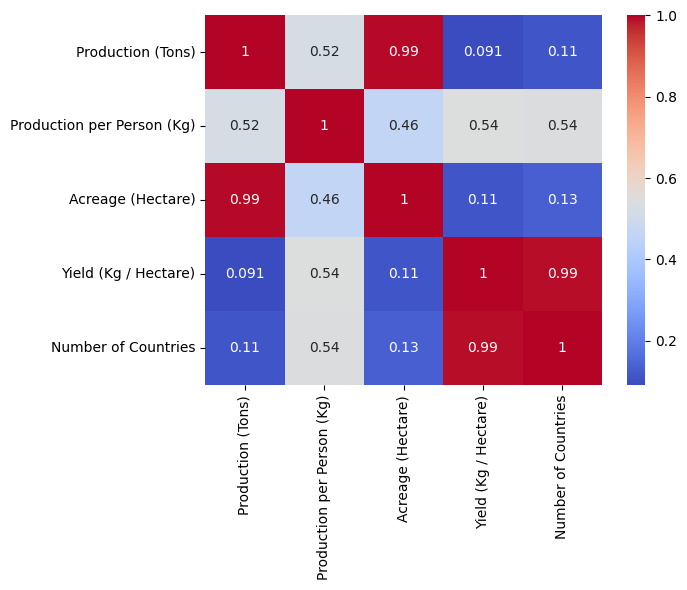

In [ ]:
correlation = df_continent.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')